In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
train_path = "../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv"
df=pd.read_csv(train_path)
df.head()
train_set = pd.read_csv(train_path)

In [3]:
import nltk


In [4]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


In [5]:
from gensim.models import Word2Vec,KeyedVectors,FastText

In [6]:
train_set['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
sentences_df = df[['review']]
sentences_df['review'] = sentences_df['review'].astype(str)
sentences_df['lower_sentence'] = sentences_df['review'].str.lower()
sentences_df['lower_sentence'][100]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


"this short film that inspired the soon-to-be full length feature - spatula madness - is a hilarious piece that contends against similar cartoons yielding multiple writers. the short film stars edward the spatula who after being fired from his job, joins in the fight against the evil spoons. this premise allows for some funny content near the beginning, but is barely present for the remainder of the feature. this film's 15-minute running time is absorbed by some odd-ball comedy and a small musical number. unfortunately not much else lies below it. the plot that is set up doesn't really have time to show. but it's surely follows it plot better than many high-budget hollywood films. this film is worth watching at least a few times. take it for what it is, and don't expect a deep story."

In [8]:
import re
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)
sentences_df['lower_sentence']=sentences_df['lower_sentence'].apply(remove_tags)
sentences_df['lower_sentence'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: lower_sentence, dtype: object

In [9]:
#removing stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words("english")) 
    tokens=word_tokenize(text)
    tokens_without_sw = [word for word in tokens if not word in stop_words]
    filtered_text = ' '.join(tokens_without_sw)
    return filtered_text
sentences_df['lower_sentence']=sentences_df['lower_sentence'].apply(remove_stopwords)
sentences_df['lower_sentence'].head()

# fastTextSentences = sentences_df['lower_sentence'].values
# fastTextVec = [nltk.word_tokenize(sentence) for sentence in fastTextSentences]
# fastTextVec[2]

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production . filming techniqu...
2    thought wonderful way spend time hot summer we...
3    basically 's family little boy ( jake ) thinks...
4    petter mattei 's `` love time money '' visuall...
Name: lower_sentence, dtype: object

In [26]:
import torch
#removing punctuation
import string
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
sentences_df['lower_sentence']=sentences_df['lower_sentence'].apply(remove_punctuations)
sentences_df['lower_sentence'].head()
train_df = np.column_stack((sentences_df['lower_sentence'], train_set['sentiment']))
DF = pd.DataFrame(train_df)
DF
DF.to_csv("data.csv")

In [11]:
fastTextSentences = sentences_df['lower_sentence'].values
print(fastTextSentences)
torch.save(fastTextSentences, 'fasttextsentences.pt')
fastTextVec = [nltk.word_tokenize(sentence) for sentence in fastTextSentences]
torch.save(fastTextVec, 'fasttextvec.pt')
fastTextVec[2]


['one reviewers mentioned watching 1 oz episode ll hooked  right  exactly happened methe first thing struck oz brutality unflinching scenes violence  set right word go  trust  show faint hearted timid  show pulls punches regards drugs  sex violence  hardcore  classic use wordit called oz nickname given oswald maximum security state penitentary  focuses mainly emerald city  experimental section prison cells glass fronts face inwards  privacy high agenda  em city home manyaryans  muslims  gangstas  latinos  christians  italians  irish  so scuffles  death stares  dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows would nt dare  forget pretty pictures painted mainstream audiences  forget charm  forget romance  oz nt mess around  first episode ever saw struck nasty surreal  could nt say ready  watched  developed taste oz  got accustomed high levels graphic violence  violence  injustice  crooked guards ll sold nickel  inmates ll kill order get away

['thought',
 'wonderful',
 'way',
 'spend',
 'time',
 'hot',
 'summer',
 'weekend',
 'sitting',
 'air',
 'conditioned',
 'theater',
 'watching',
 'lighthearted',
 'comedy',
 'plot',
 'simplistic',
 'dialogue',
 'witty',
 'characters',
 'likable',
 'even',
 'well',
 'bread',
 'suspected',
 'serial',
 'killer',
 'may',
 'disappointed',
 'realize',
 'match',
 'point',
 '2',
 'risk',
 'addiction',
 'thought',
 'proof',
 'woody',
 'allen',
 'still',
 'fully',
 'control',
 'style',
 'many',
 'us',
 'grown',
 'lovethis',
 'd',
 'laughed',
 'one',
 'woody',
 's',
 'comedies',
 'years',
 'dare',
 'say',
 'decade',
 've',
 'never',
 'impressed',
 'scarlet',
 'johanson',
 'managed',
 'tone',
 'sexy',
 'image',
 'jumped',
 'right',
 'average',
 'spirited',
 'young',
 'womanthis',
 'may',
 'crown',
 'jewel',
 'career',
 'wittier',
 'devil',
 'wears',
 'prada',
 'interesting',
 'superman',
 'great',
 'comedy',
 'go',
 'see',
 'friends']

In [12]:
fastTextModel = FastText(sentences = fastTextVec,vector_size = 50, window=5, min_count= 3)
fastTextModel.save('FastText.model')

In [13]:
fastTextModel.wv.most_similar('comedy')

[('comedya', 0.9876922965049744),
 ('comedyi', 0.9861230850219727),
 ('comedyit', 0.9804700016975403),
 ('comedys', 0.97708660364151),
 ('comedyas', 0.977048933506012),
 ('comedybut', 0.9716243147850037),
 ('comedyspoof', 0.9643436074256897),
 ('comedythis', 0.9411319494247437),
 ('comedydrama', 0.9350035190582275),
 ('comedydramas', 0.9255385994911194)]

In [14]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
modelPath = './FastText.model'
myModel = Word2Vec.load(modelPath)
myModel

In [16]:
embeddings = [] 
for i in myModel.wv.index_to_key:
    embeddings.append(myModel.wv[i])

In [17]:
vocab = myModel.wv.index_to_key
X = myModel.wv[vocab]
em_df = pd.DataFrame(embeddings)

In [18]:
X_corr=em_df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


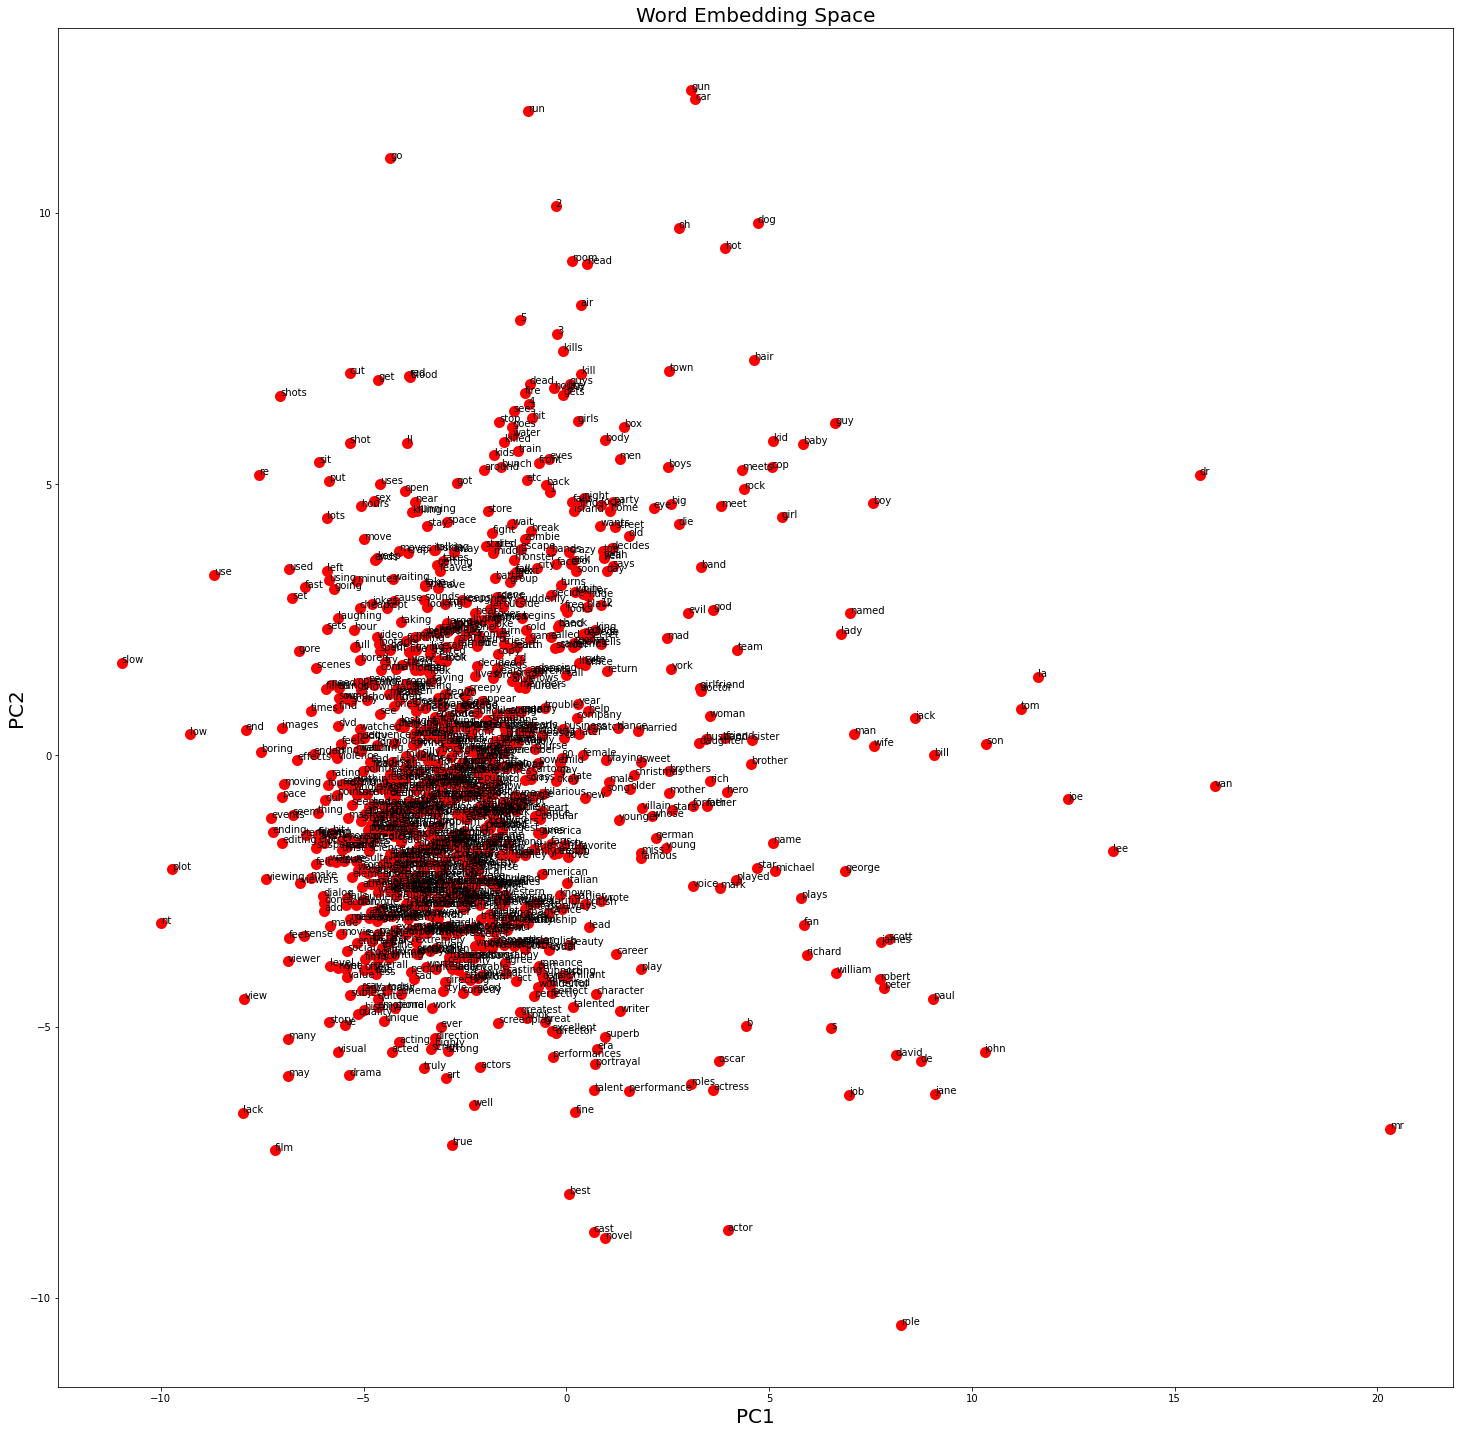

In [19]:
dim = 1000
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
plt.scatter(neww_X[:,0][0:dim],neww_X[:,1][0:dim],linewidths=5,color='red')
plt.xlabel("PC1",size=20)
plt.ylabel("PC2",size=20)
plt.title("Word Embedding Space",size=20)
for i,word in enumerate(vocab[0:dim]):
    plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

x = (neww_X[:,0])[0:50]
y = (neww_X[:,1])[0:50]

In [20]:
vocab_freq = dict()
vocab_freq

{}

In [21]:
for sentence in fastTextVec :
    for word in sentence :
        if word not in vocab_freq.keys():
            vocab_freq[word] = 1
        else :
            vocab_freq[word] = vocab_freq[word] + 1

In [22]:
flat_fastTextVec =  [word for sentence in fastTextVec for word in sentence]

In [23]:
from collections import Counter
counts = Counter(flat_fastTextVec)

In [24]:
len(counts.most_common())

187641